# Starting Kit for the microbe challenge

Version of Python used for this starting kit: 2.7.11

Libraries used : 
                 - numpy
                 - pandas
                 - matplotlib
                 - sklearn


### Start by importing your libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#import seaborn as sns; sns.set()

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

import os

import warnings
warnings.filterwarnings('ignore')

path = '.'

### Then read the data: 
    - The train data (supplied with the labels) : used to train and test your model.
    - The valid data (supplied without the labels) : used to submit in the public leaderboard (5 times a day)
    - The test data (supplied without the labels) : used to submit in the private leaderboard (once a day)

In [16]:
data_train = pd.read_csv('data/train_set.csv', sep=',')
data_valid = pd.read_csv('data/valid_set.csv', sep=',')
data_test = pd.read_csv('data/test_set.csv', sep=',')

data_valid = data_valid.drop('time_in_hospital',axis=1)
data_test = data_test.drop('time_in_hospital',axis=1)

# Exploring and analyzing the data

In [8]:
data_train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,time_in_hospital
0,Caucasian,Male,[70-80),3,1,7,57,0,16,0,0,0,428,250,401,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30,1
1,Hispanic,Male,[30-40),2,1,7,36,3,10,0,0,3,576,577,305,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1
2,Caucasian,Male,[60-70),1,1,7,1,0,9,0,0,0,786,250,272,4,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,>30,1
3,Caucasian,Female,[80-90),1,1,7,2,0,11,0,1,0,780,401,272,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,1
4,Caucasian,Female,[80-90),1,4,6,45,0,9,0,0,0,434,433,401,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,1


In [4]:
data_train.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,time_in_hospital
count,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000
mean,2.026742,3.731456,5.770369,43.142891,1.354442,16.121301,0.365363,0.197162,0.638259,7.491254,0.578724
std,1.448840,5.277416,4.071495,19.732958,1.711352,8.135812,1.212356,0.951375,1.263519,1.842723,0.815529
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,-1.000000
25%,1.000000,1.000000,1.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,1.000000
50%,1.000000,1.000000,7.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000
75%,3.000000,4.000000,7.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,8.000000,28.000000,25.000000,129.000000,6.000000,75.000000,39.000000,76.000000,18.000000,16.000000,1.000000


### Let's pretend we want to know more about the race feature.
The race values are categorical. Thus a histogram might give us useful information.
Below is the plot. Try to understand the distribution ! Maybe the analysis would give some ideas about the feature engineering. We remind you that the feature engineering and transformation is the best way to increase your score.

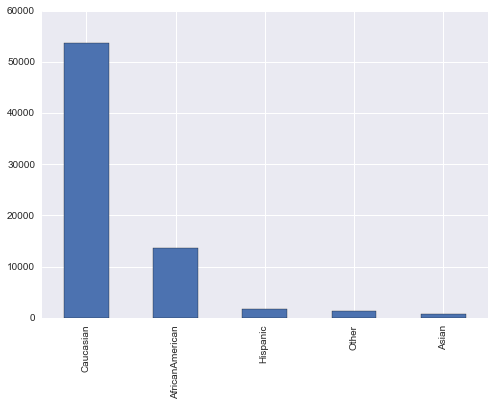

In [10]:
data_train.race.value_counts().plot(kind='bar')

### Now let's give an analysis example of a numeric feature: num_medications


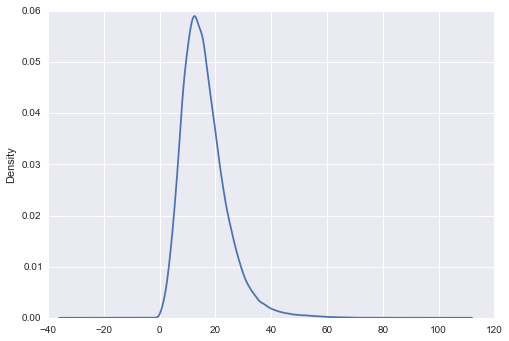

In [17]:
data_train["num_medications"].plot(kind="density")

## A first prediction.

### First let's code the same evaluation function used to evaluate your submissions.

In [23]:
def pandastolist(pd):
    aux = []
    for v in pd.values:
        aux.append(v[0])
    return aux

def evaluate(solution,prediction):
    if str(type(solution)) == "<class 'pandas.core.frame.DataFrame'>":
        solution = pandastolist(solution)
        
    solution = np.asarray(solution)
    prediction = np.asarray(prediction)
    ones = np.ones_like(solution)
    score = 0
    if (len(solution)!=len(prediction)):
        print("the length of the prediction list must be equal to: "+str(len(solution))+"instead of :"+str(len(prediction)))
        return score
    else:
        TP = float(np.dot((solution + ones),(prediction + ones)))/4.0
        nb_pos = float(np.sum(((solution + ones)/2)))
        TN = float(np.dot((ones-solution),(ones-prediction)))/4.0
        nb_neg = float(len(solution) - nb_pos)
        score = 0.5*(TP/nb_pos + TN/nb_neg)
        return score

### As there are many categorical features, we need to transform them into numerical attributes. Here is one way to do that. You can also use another transforming technique.

We transform every category by its frequency in the feature.

In [65]:
data_train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,time_in_hospital
0,53645,32772,18346,3,1,7,57,0,16,0,0,0,4831,3968,5905,9,67457,59499,12824,70137,70733,71183,67563,71235,62304,63695,71218,66085,66810,71019,71215,71234,71208,71236,71236,21432,70745,71226,71236,71234,71235,33020,54811,24885,1
1,1735,32772,2534,2,1,7,36,3,10,0,0,3,66,287,650,5,67457,59499,57274,70137,70733,71183,67563,71235,62304,63695,71218,66085,66810,71019,71215,71234,71208,71236,71236,8028,70745,71226,71236,71234,71235,33020,54811,24885,1
2,53645,32772,15892,1,1,7,1,0,9,0,0,0,2768,3968,1400,4,67457,59499,57274,70137,70733,71183,67563,71235,62304,63695,71218,4890,66810,71019,71215,71234,71208,71236,71236,33267,480,71226,71236,71234,71235,33020,54811,24885,1
3,53645,38461,12165,1,1,7,2,0,11,0,1,0,1439,2614,1400,8,67457,59499,57274,70137,70733,71183,67563,71235,7970,63695,71218,66085,66810,71019,71215,71234,71208,71236,71236,33267,70745,71226,71236,71234,71235,38216,54811,38366,1
4,53645,38461,12165,1,4,6,45,0,9,0,0,0,1429,108,5905,5,67457,59499,57274,70137,70733,71183,67563,71235,62304,63695,71218,66085,66810,71019,71215,71234,71208,71236,71236,33267,70745,71226,71236,71234,71235,38216,16425,38366,1


In [7]:
features = data_train.columns.get_values()

for f in features:
    if type(data_train[f][0]) == str:
        counts=data_train[f].value_counts()
        data_train[f] = data_train[f].apply(lambda f: counts[f])        

### We split the data into training data and test data.

In [8]:
from sklearn.cross_validation import train_test_split

X = data_train.drop('time_in_hospital', 1)
y= data_train['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### The random forest is one of the most accurate classifiers. Let's test this algorithm but without any parameter tunning. 

First, the model learns on the training data (X_train,y_train). Then the model is tested on the test data (X_test,y_test).

In [9]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)
score = evaluate(list(y_test), list(model.predict(X_test)))
print( "Score: {:.4f}".format(score))

Score: 0.6496


### Let's give a look on the best features.

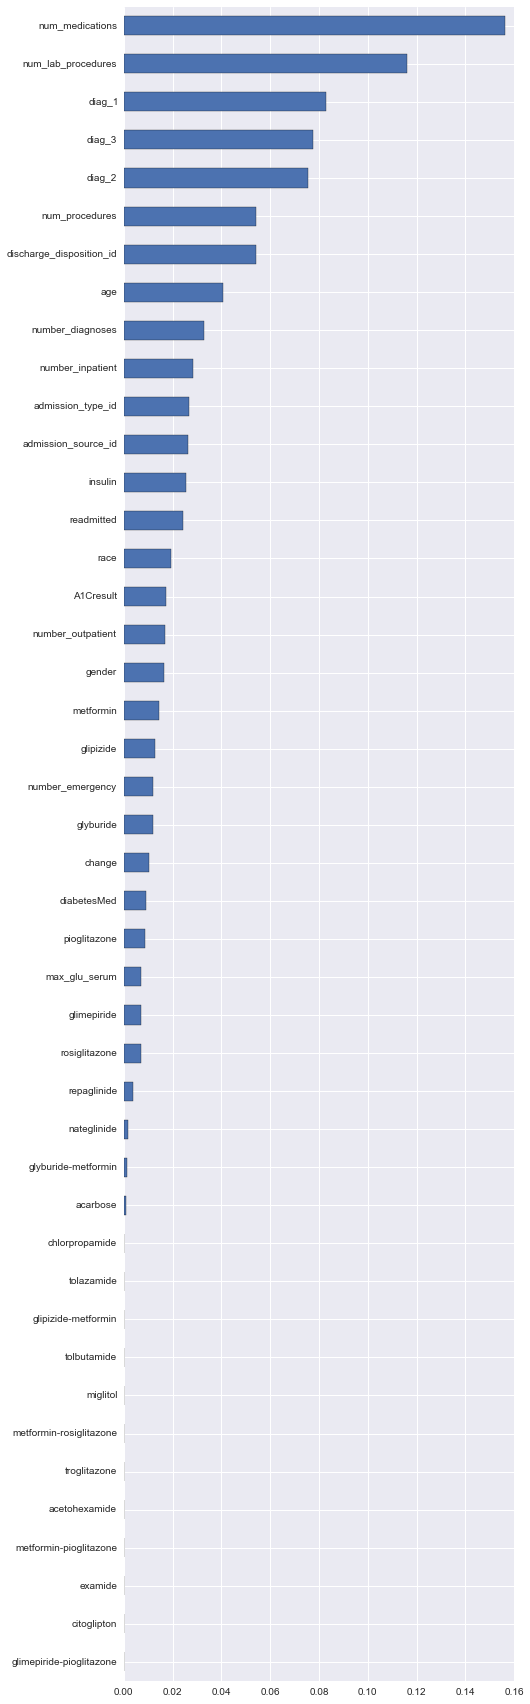

In [125]:
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort()
feature_importance.plot(kind='barh',figsize=(7,30))

## Submission

Let's prepare a submission for the valid set using the model we trained on our train set

In [18]:
features = data_valid.columns.get_values()

for f in features:
    if type(data_valid[f][0]) == str:
        counts=data_valid[f].value_counts()
        data_valid[f] = data_valid[f].apply(lambda f: counts[f])  

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

pred = model.predict(data_valid.values)

pred = pd.DataFrame(pred)
pred.to_csv('valid.predict', encoding='utf-8',index=False)


Now you are ready to submit your predictions (the file valid.predict)

# GOOD LUCK !!!!!